In [110]:
import numpy as np
import bayespy.plot as bpplt
from bayespy.utils import random
from bayespy.nodes import Categorical, Dirichlet, Beta, Mixture, Bernoulli
from bayespy.inference import VB
from operator import mul
from functools import reduce
%matplotlib inline

In [111]:
def prod(l):
    return reduce(mul, l, 1)

In [1]:
predicates = ['animal_pred_' + str(i) for i in range(1,6)] + \
             ['transport_pred_' + str(i) for i in range(1,6)] + \
             ['art_pred_' + str(i) for i in range(1,6)]

In [3]:
print(predicates)
print(len(predicates))

['animal_pred_1', 'animal_pred_2', 'animal_pred_3', 'animal_pred_4', 'animal_pred_5', 'transport_pred_1', 'transport_pred_2', 'transport_pred_3', 'transport_pred_4', 'transport_pred_5', 'art_pred_1', 'art_pred_2', 'art_pred_3', 'art_pred_4', 'art_pred_5']
15


In [14]:
p0 = [.8,.8,.8,.8,.8,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
p1 = [.1,.1,.1,.1,.1,.8,.8,.8,.8,.8,.1,.1,.1,.1,.1]
p2 = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.8,.8,.8,.8,.8]
p = np.array([p0, p1, p2])

In [19]:
z = random.categorical([1/3, 1/3, 1/3], size=300)

In [20]:
print(z)

[1 0 1 0 1 0 2 2 0 0 0 1 2 0 0 1 0 1 2 2 0 0 2 2 2 2 0 2 2 0 1 2 1 2 0 0 1
 2 0 1 2 2 2 2 2 0 1 2 2 1 1 1 0 0 0 0 0 0 0 2 2 0 0 2 0 2 1 1 1 2 2 0 1 0
 0 1 0 2 1 0 2 0 2 1 2 1 0 1 1 0 0 2 1 1 1 1 1 2 2 1 0 0 0 2 1 1 1 0 1 1 0
 2 2 0 0 0 1 0 2 2 0 2 2 1 2 0 1 1 0 0 1 0 0 2 0 2 0 0 0 0 0 2 0 2 0 1 2 2
 0 1 2 1 0 1 0 2 0 2 0 1 0 0 2 2 0 1 0 0 2 0 1 0 2 1 0 0 0 2 1 2 1 2 1 2 1
 2 1 2 1 0 1 1 2 0 2 0 0 1 1 0 1 0 2 1 0 2 2 0 2 1 1 2 1 2 2 1 1 2 2 1 2 0
 0 1 1 2 1 1 0 2 2 2 1 0 2 0 0 0 0 1 2 1 0 1 2 1 2 0 2 2 1 0 0 2 2 2 2 1 0
 1 2 2 2 2 2 0 1 1 1 1 2 2 1 1 1 1 1 0 0 0 1 1 1 1 1 1 2 1 1 2 2 0 0 0 1 1
 0 0 0 1]


In [21]:
x = random.bernoulli(p[z])

In [22]:
print(x.shape)
print(x[0])

(300, 15)
[False False False False False  True  True  True  True  True False False
 False False False]


In [54]:
N = 300 # num_data
D = 15  # num_dim
K = 3  # num_comp

In [55]:
R = Dirichlet(K*[1e-5], name='R') # prior for comps
Z = Categorical(R, plates=(N,1), name='Z') # group assignments

In [56]:
from bayespy.nodes import Beta
P = Beta([.5,.5], plates=(D,K), name='P') # dimD=10, compK=10 (prob pattern for each group)

In [57]:
X = Mixture(Z, Bernoulli, P)

In [58]:
Q = VB(Z,R,X,P)

In [59]:
P.initialize_from_random()

In [60]:
X.observe(x)

In [61]:
Q.update(repeat=1000)

Iteration 1: loglike=-3.014632e+03 (0.005 seconds)
Iteration 2: loglike=-2.853357e+03 (0.003 seconds)
Iteration 3: loglike=-2.506836e+03 (0.003 seconds)
Iteration 4: loglike=-2.222900e+03 (0.003 seconds)
Iteration 5: loglike=-2.118718e+03 (0.003 seconds)
Iteration 6: loglike=-2.101071e+03 (0.003 seconds)
Iteration 7: loglike=-2.100304e+03 (0.003 seconds)
Iteration 8: loglike=-2.100276e+03 (0.003 seconds)
Iteration 9: loglike=-2.100275e+03 (0.002 seconds)
Converged at iteration 9.


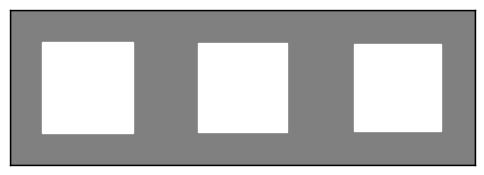

In [62]:
bpplt.hinton(R)

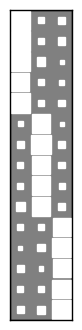

In [63]:
bpplt.hinton(P)

In [66]:
# bpplt.hinton(Z)

In [91]:
gamma = R.get_parameters()[0]
gamma

array([ 102.71827749,  100.31608312,   96.96566939])

In [92]:
pi = np.array([gamma[j]/sum(gamma) for j in range(3)])
pi

array([ 0.34239422,  0.33438691,  0.32321887])

In [93]:
alpha_beta = P.get_parameters()[0]
alpha_beta

array([[[ 82.61050939,  21.1077581 ],
        [  8.58525091,  92.73082221],
        [ 11.3042397 ,  86.66141969]],

       [[ 89.23478755,  14.48347993],
        [ 11.04612505,  90.26994807],
        [ 13.21908739,  84.746572  ]],

       [[ 88.06067052,  15.65759697],
        [ 17.93446148,  83.38161164],
        [  4.504868  ,  93.46079139]],

       [[ 77.81042323,  25.90784426],
        [  9.17862427,  92.13744885],
        [  6.5109525 ,  91.45470689]],

       [[ 89.36033708,  14.35793041],
        [ 10.50651747,  90.80955565],
        [ 10.63314545,  87.33251395]],

       [[  7.65563748,  96.06263   ],
        [ 81.11135339,  20.20471973],
        [  3.73300912,  94.23265027]],

       [[ 11.09944245,  92.61882504],
        [ 85.95342686,  15.36264626],
        [ 10.44713069,  87.5185287 ]],

       [[  8.6872281 ,  95.03103939],
        [ 79.16274112,  22.153332  ],
        [  9.65003078,  88.31562861]],

       [[  9.06026236,  94.65800513],
        [ 79.98849192,  21.3275812

In [101]:
fi = np.array([[alpha_beta[j][0][0]/sum(alpha_beta[j][0]) for j in range(15)],
               [alpha_beta[j][1][0]/sum(alpha_beta[j][1]) for j in range(15)],
               [alpha_beta[j][2][0]/sum(alpha_beta[j][2]) for j in range(15)]]) # 3 x 15

In [102]:
fi # probs for positives

array([[ 0.79648948,  0.86035748,  0.84903723,  0.75020944,  0.86156797,
         0.07381185,  0.10701531,  0.08375794,  0.08735455,  0.17803263,
         0.09165566,  0.04240749,  0.11384522,  0.08176768,  0.10487097],
       [ 0.0847373 ,  0.10902638,  0.17701497,  0.09059396,  0.1037004 ,
         0.80057735,  0.84836911,  0.78134435,  0.78949459,  0.80258682,
         0.10213377,  0.12188679,  0.05474456,  0.10449075,  0.15149144],
       [ 0.11538982,  0.13493593,  0.04598415,  0.06646158,  0.10853952,
         0.03810528,  0.10664074,  0.09850422,  0.09647509,  0.0992166 ,
         0.76195926,  0.84470904,  0.78747662,  0.79040559,  0.85003711]])

In [117]:
def prob_cls(i, obs): # probability of obs from cls i
    f_obs = [fi[i][idx] if j==1 else (1-fi[i][idx]) for idx,j in enumerate(obs)]
    return pi[i] * prod(f_obs)

def classify(obs):
    return np.argmax([prob_cls(i,obs) for i in range(3)])

In [120]:
obs = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
classify(obs)

1